In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('Linear_regresstion/advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.shape

(200, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### Linear regression steps :
1. Reading and understanding data
2. Training the model
3. Residual Analysis
4. Predicting and evaluating the model

### Step 1 : reading and understading data

In [5]:

df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


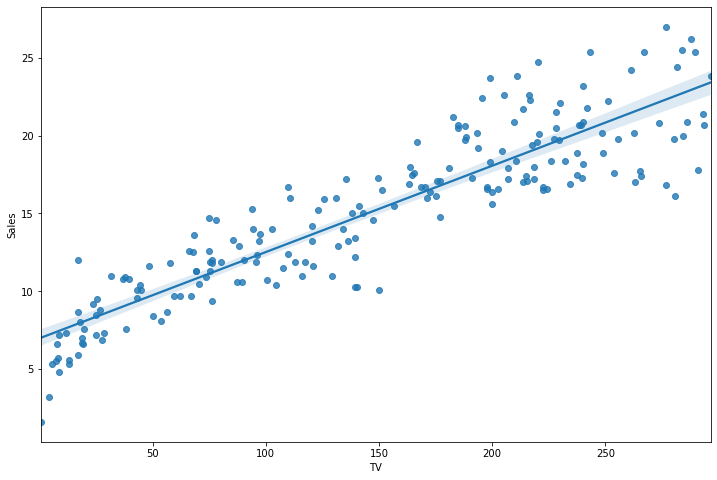

In [6]:
sns.regplot(x='TV',y='Sales',data=df,)
fig = plt.gcf() #get current figure
fig.set_size_inches(12,8)
plt.show()

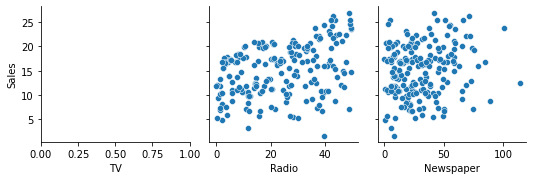

In [7]:
#visualize all 3 plots

sns.pairplot(data=df, x_vars=['TV','Radio','Newspaper'],y_vars='Sales')

plt.show()

In [8]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


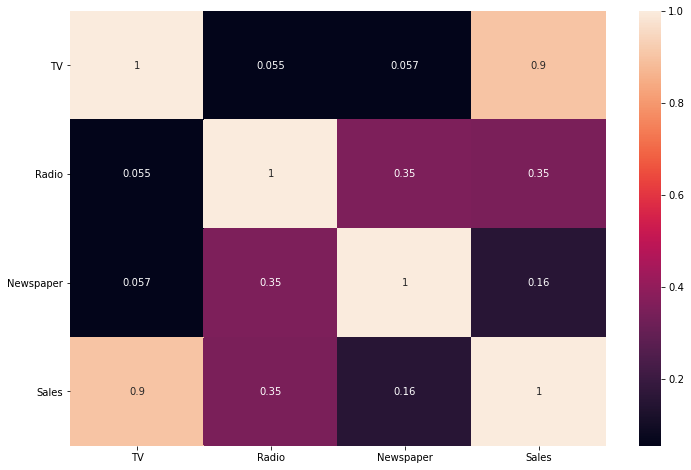

In [9]:
sns.heatmap(df.corr(),annot=True)
plt.gcf().set_size_inches(12,8)
plt.show()
#lighter shades high positive correlations


In [10]:
# create X and Y
X = df['TV'] #predictive variables - can be more than one - DF
y =df['Sales'] #predictive variable - usually one

In [11]:
X_train, X_test, y_train,y_test = train_test_split(X,y,train_size=.70,random_state=100)

In [12]:
X_train_sm = sm.add_constant(X_train)
X_train_sm

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3
...,...,...
87,1.0,110.7
103,1.0,187.9
67,1.0,139.3
24,1.0,62.3


### Step2 : fitting the model - Training the model

In [13]:
#fitting the model
# OLS stands for Ordinary Least Squares, which is the method that 'statsmodels' use to fit the line. 
# You use the command 'add_constant' so that statsmodels also fits an intercept. 
# If you don't use this command, it will fit a line passing through the origin by default.


lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [14]:
# Sales = 6.94 + 0.05*TV

In [15]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Mon, 03 May 2021   Prob (F-statistic):           1.52e-52
Time:                        19:05:33   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

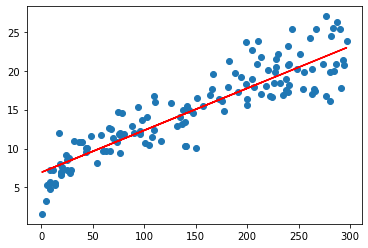

In [16]:
plt.scatter(X_train,y_train)
plt.plot(X_train,6.948+.054*X_train,'r')

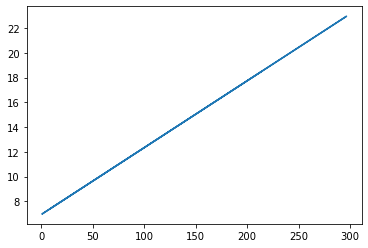

In [17]:
plt.plot(X_train,6.948+.054*X_train)

### Step 3. Residual Analysis

#### Residual Analysis is distribution of the Error terms

In [18]:
# error = f(y_train,X_train)

In [19]:
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred

74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
         ...    
87     12.986898
103    17.197830
67     14.546907
24     10.346884
8       7.417777
Length: 140, dtype: float64

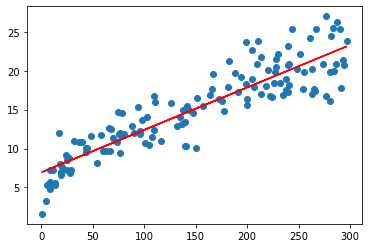

In [20]:
plt.scatter(X_train,y_train)
plt.plot(X_train,y_train_pred,'r')
plt.show()

In [21]:
residuals = y_train-y_train_pred
residuals

74    -1.588747
3      1.287635
185    4.469437
26     0.256729
90    -0.274178
         ...   
87     3.013102
103    2.502170
67    -1.146907
24    -0.646884
8     -2.617777
Length: 140, dtype: float64

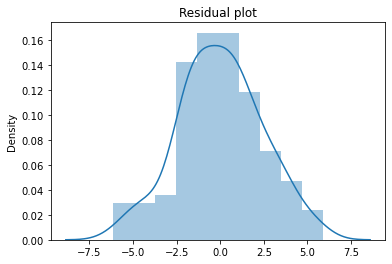

In [22]:
sns.distplot(residuals)
plt.title('Residual plot')
plt.show()

<AxesSubplot:xlabel='TV'>

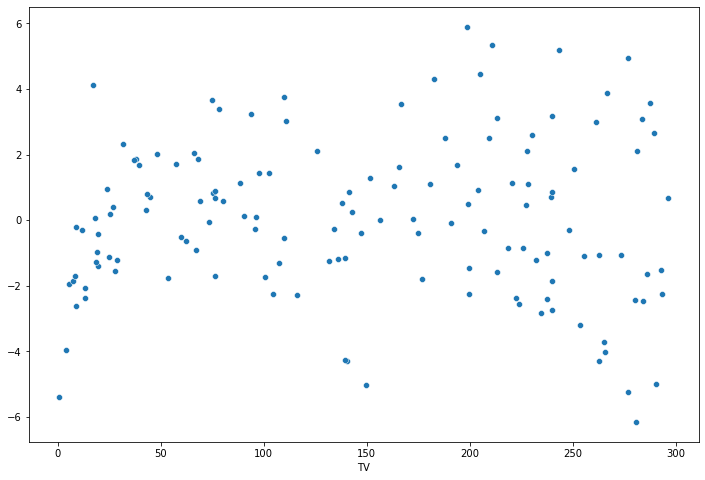

In [23]:
plt.gcf().set_size_inches(12,8)
sns.scatterplot(X_train,residuals)

### Step 4 - making predition and evaliating model

In [24]:
X_test_sm = sm.add_constant(X_test) # add constatnt

In [25]:
y_test_pred = lr_model.predict(X_test_sm) #pred on test

In [26]:
# evaluate the model - r-sqaured
r2 = r2_score(y_true=y_test, y_pred=y_test_pred)
r2

0.7921031601245658

In [27]:
#r2 on train
r2_score(y_true=y_train, y_pred=y_train_pred)

0.8157933136480389

In [28]:
#mean squared error
mean_squared_error(y_true=y_test, y_pred=y_test_pred)

4.077556371826956

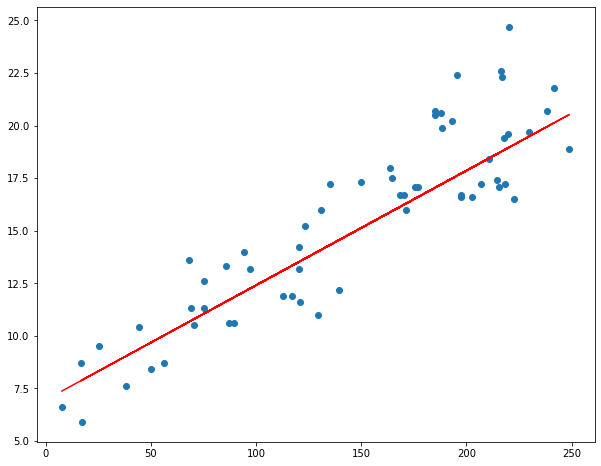

In [29]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_test_pred,'r')
plt.gcf().set_size_inches(10,8)
plt.show()

## Using SciKitLearn - sklearn

In [30]:
# 1 . train test split
# create X and Y
X = df['TV'] #predictive variables - can be more than one - DF
y =df['Sales'] #predictive variable - usually one - Dependent or Output variable
X_train,X_test, y_train,y_test = train_test_split(X,y,train_size=.70, random_state=100)

In [31]:
lm = LinearRegression()


In [32]:
lm.fit(X_train,y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[213.4 151.5 205.  142.9 134.3  80.2 239.8  88.3  19.4 225.8 136.2  25.1
  38.  172.5 109.8 240.1 232.1  66.1 218.4 234.5  23.8  67.8 296.4 141.3
 175.1 220.5  76.4 253.8 191.1 287.6 100.4 228.  125.7  74.7  57.5 262.7
 262.9 237.4 227.2 199.8 228.3 290.7 276.9 199.8 239.3  73.4 284.3 147.3
 224.  198.9 276.7  13.2  11.7 280.2  39.5 265.6  27.5 280.7  78.2 163.3
 213.5 293.6  18.7  75.5 166.8  44.7 109.8   8.7 266.9 206.9 149.8  19.6
  36.9 199.1 265.2 165.6 140.3 230.1   5.4  17.9 237.4 286.   93.9 292.9
  25.   97.5  26.8 281.4  69.2  43.1 255.4 239.9 209.6   7.3 240.1 102.7
 243.2 137.9  18.8  17.2  76.4 139.5 261.3  66.9  48.3 177.   28.6 180.8
 222.4 193.7  59.6 131.7   8.4  13.1   4.1   0.7  76.3 250.9 273.7  96.2
 210.8  53.5  90.4 104.6 283.6  95.7 204.1  31.5 182.6 289.7 156.6 107.4
  43.  248.4 116.  110.7 187.9 139.3  62.3   8.6].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [33]:
X_train.shape

(140,)

In [34]:
#reshape x_train to (140,1)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
X_train.shape

(140, 1)

In [35]:
#fit model
lm_model = lm.fit(X_train,y_train)

In [36]:
lm.coef_

array([0.05454575])

In [37]:
lm.intercept_

6.948683200001357

In [38]:
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)


In [39]:
#check strength of model
r2_score(y_pred=y_test_pred,y_true=y_test)

0.7921031601245662

In [40]:
r2_score(y_pred=y_train_pred,y_true=y_train)

0.8157933136480389

## Multiple linear regression

In [69]:
df_housing = pd.read_csv('Linear_regresstion\Housing.csv')

In [46]:
df_housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [47]:
df_housing.shape

(545, 13)

In [48]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [49]:
df_housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


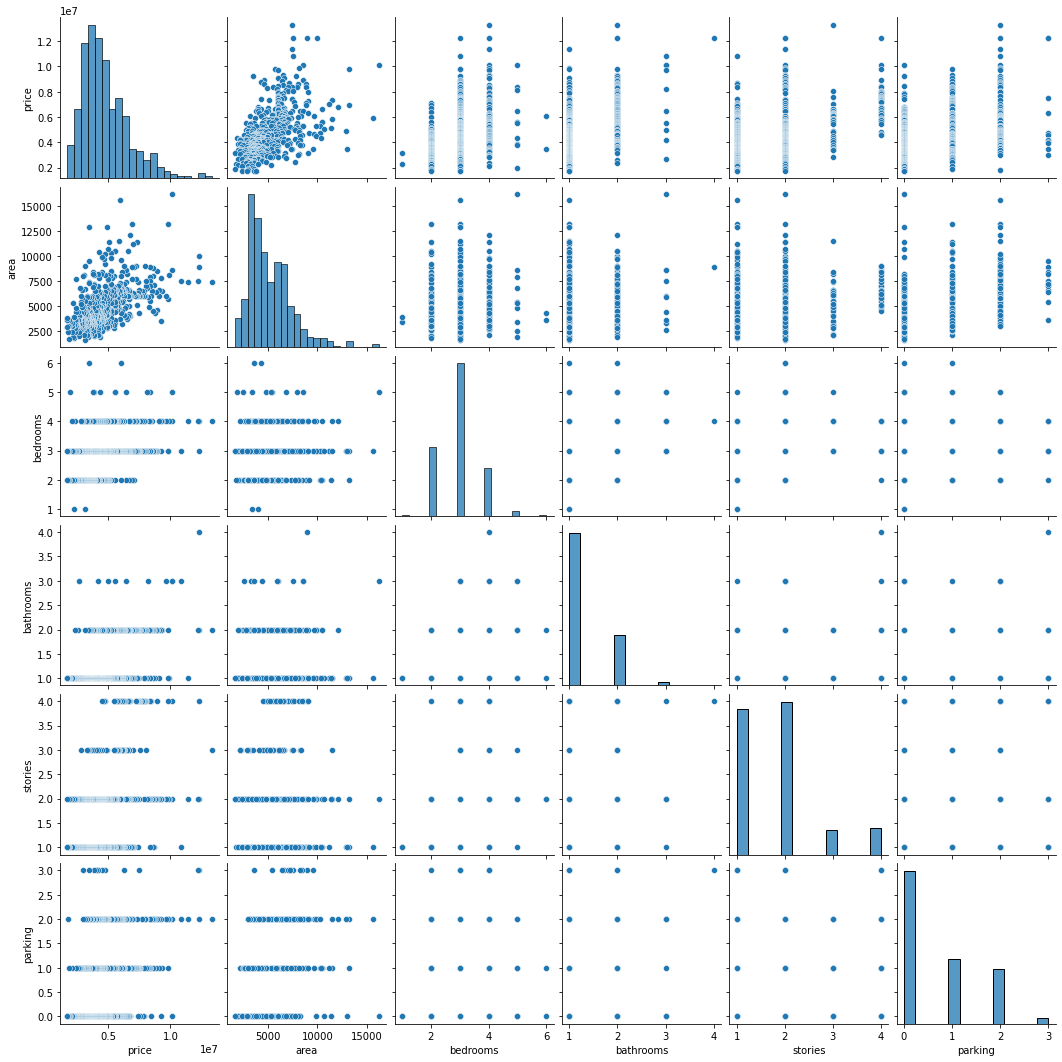

In [50]:
#visualize numerical variable
sns.pairplot(df_housing)

In [51]:
#visualize categorical variable
df_housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

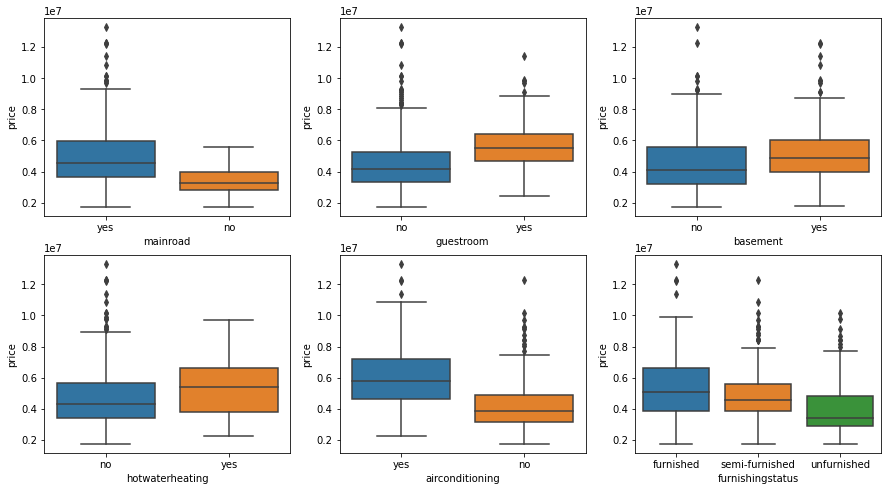

In [63]:
#plt.gcf().set_size_inches(12,8)
plt.figure(figsize=(15,8))

plt.subplot(2,3,1)
sns.boxplot(x='mainroad',y='price',data=df_housing)

plt.subplot(2,3,2)
sns.boxplot(x='guestroom',y='price',data=df_housing)

plt.subplot(2,3,3)
sns.boxplot(x='basement',y='price',data=df_housing)

plt.subplot(2,3,4)
sns.boxplot(x='hotwaterheating',y='price',data=df_housing)

plt.subplot(2,3,5)
sns.boxplot(x='airconditioning',y='price',data=df_housing)

plt.subplot(2,3,6)
sns.boxplot(x='furnishingstatus',y='price',data=df_housing)

plt.show()


## Preparing data for modelling
- Encoding
    - converting binary to 1/0
    - other categorical to dummy varibale

In [64]:
df_housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [65]:
vatlist = ['mainroad','guestroom', 'basement', 'hotwaterheating', 'airconditioning','prefarea']

In [66]:
df_housing[vatlist]

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,yes,no,no,no,yes,yes
1,yes,no,no,no,yes,no
2,yes,no,yes,no,no,yes
3,yes,no,yes,no,yes,yes
4,yes,yes,yes,no,yes,no
...,...,...,...,...,...,...
540,yes,no,yes,no,no,no
541,no,no,no,no,no,no
542,yes,no,no,no,no,no
543,no,no,no,no,no,no


In [70]:
df_housing[vatlist] = df_housing[vatlist].apply(lambda x: x.map({'yes':1,'no':0}))
df_housing[vatlist]

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0
...,...,...,...,...,...,...
540,1,0,1,0,0,0
541,0,0,0,0,0,0
542,1,0,0,0,0,0
543,0,0,0,0,0,0


In [76]:
# Reading the input
# import ast,sys
# input_str = sys.stdin.read()
# input_list = ast.literal_eval(input_str)
# Storing the names in a variable 'name'
name = ['Reetesh', 'Shruti', 'Kaustubh', 'Vikas', 'Mahima', 'Akshay']
# Storing the responses in a variable 'repsonse'
response = ['No', 'Maybe', 'yes', 'Yes', 'maybe', 'Yes']

# Importing pandas and converting the read lists to a dataframe. You can print
# the dataframe and run the code to see what it will look like
import pandas as pd 
df = pd.DataFrame({'Name': name,'Response': response})

# Write your code here
df['Response'] = df['Response'].str.lower().map({ 'yes':1.0, 'no':0.0,'maybe':0.5})

# Print the final DataFrame
print(df)

       Name  Response
0   Reetesh       0.0
1    Shruti       0.5
2  Kaustubh       1.0
3     Vikas       1.0
4    Mahima       0.5
5    Akshay       1.0


In [77]:
## create dummy variables
df_housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [78]:
df_housing.furnishingstatus.value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [79]:
status = pd.get_dummies(df_housing.furnishingstatus)

In [81]:
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [82]:
#drop redundent dummy variable
status = pd.get_dummies(df_housing.furnishingstatus,drop_first=True)
status

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
540,0,1
541,1,0
542,0,1
543,0,0


In [83]:
df_housing = pd.concat([df_housing,status],axis=1)
df_housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [84]:
df_housing =df_housing.drop('furnishingstatus',axis=1)
df_housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [85]:
df_train,df_test = train_test_split(df_housing, train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(381, 14)
(164, 14)


### Scaling
- min max scaling (0 or 1)
- standarization (mean 0 sigma 1)